# ** Loan Default Classification Project by Simon Joshi**

# ** Objectives:**
# 1. Build a classification model to predict clients who are likely to default on their loan 
# 2. Give recommendations to the bank on the important features to consider while approving a loan.

### **Dataset:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

# Step 1: Preliminary Data Analysis

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Printing the first and last 5 rows of the dataset**

In [4]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [6]:
data.shape

(5960, 13)

**Insights: 13 different data and each dataset should have a max 5960 data**

### **Checking the data types of the columns**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights:**

- Some data set has missing values such as Mortdue
- The data are a mix of numerical and object

### **Check for missing values**

In [8]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [9]:
# Check the percentage of missing values in the each column.
(data.isnull().sum()/data.shape[0])*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Insights:** Only two dataset does not have any missing values.

**We can convert the object type columns to categories**

- Converting "objects" to "category" reduces the data space required to store the dataframe.

### **Convert the data types**

In [10]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [11]:
cols

['REASON', 'JOB', 'BAD']

In [12]:
# Converting the data type from object to category.

for i in cols:
    data[i] = data[i].astype('category')

In [13]:
# Checking the info again and the datatype of different variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [14]:
# Analyze the summary statistics for numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Insights:**

- LOAN, MORTDUE, YOJ, CLAGE, NINQ, CLNO, and DEBTINC have outliers and are skewed to the right.
- DEROG, DELINQ values are most predominantly 0 and very few are of max.
- The mean and median of LOAN, MORTDUE, VALUE, YOJ, CLAGE, CLNO, and DEBITINC are almost equal so these are less skewed

In [15]:
# Check summary for categorical data 

data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Insights:**
- Most of the values are unique so it will be easier to perform data analysis. 
- BAD has only two unique values
- Reason has only two unique values
- JOB has 6 unique values.

# Step 2: Exploratory Data Analysis (EDA) and Visualization

## **Univariate Analysis**


### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We will use box plot and histogram to analyze the numerical columns.

In [16]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

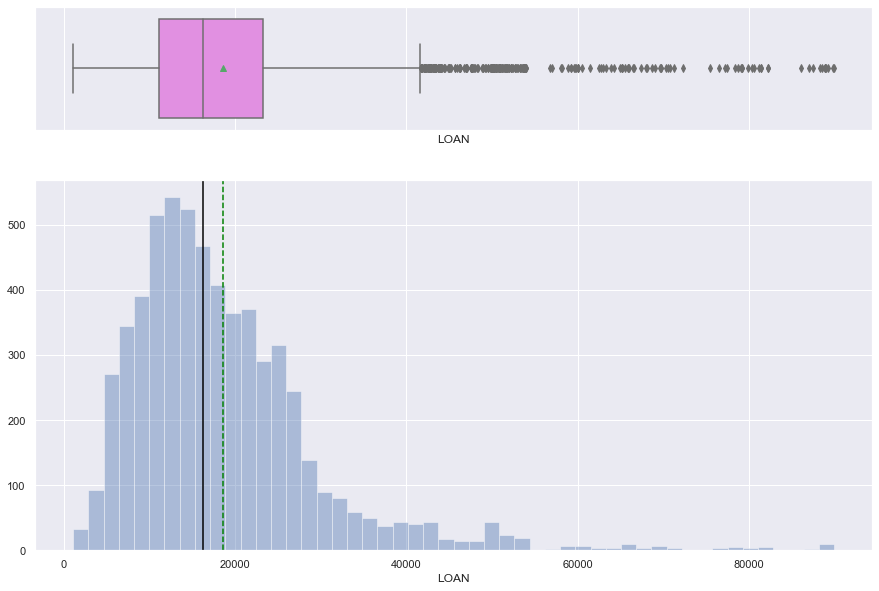

In [17]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights:** Dataset is heavily skewed to the right.

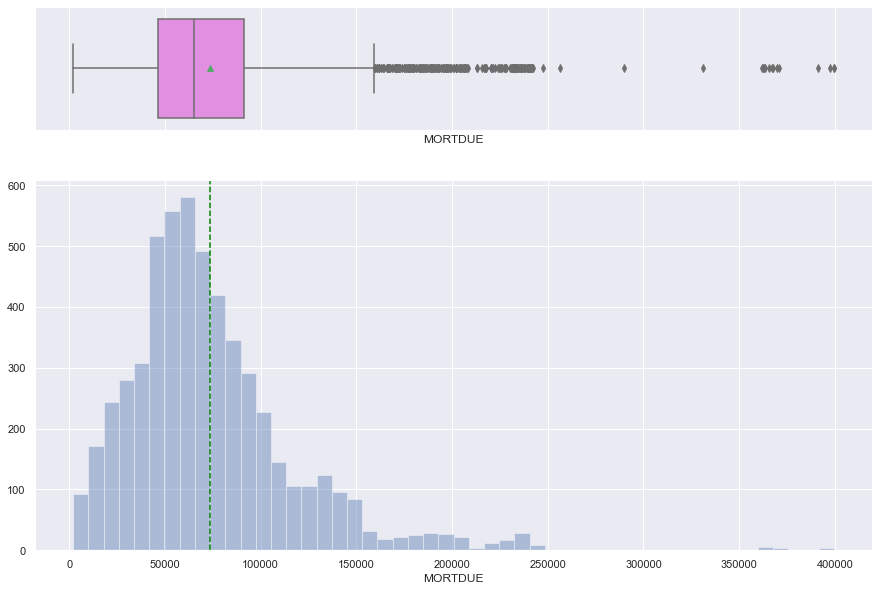

In [18]:
histogram_boxplot(data['MORTDUE'])

**Insights:** Dataset is heavily skewed to the right.

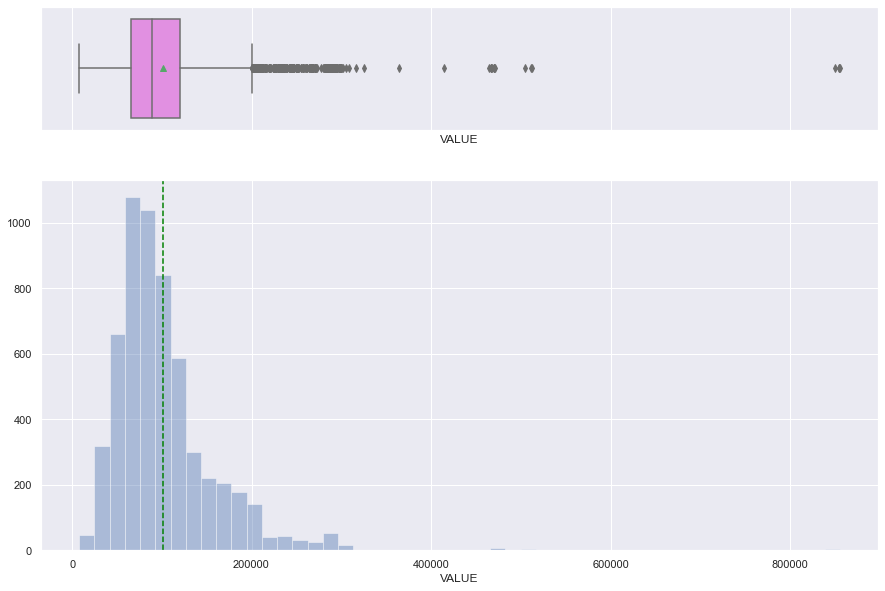

In [19]:
histogram_boxplot(data['VALUE'])

**Insights:** Dataset is heavily skewed to the right.

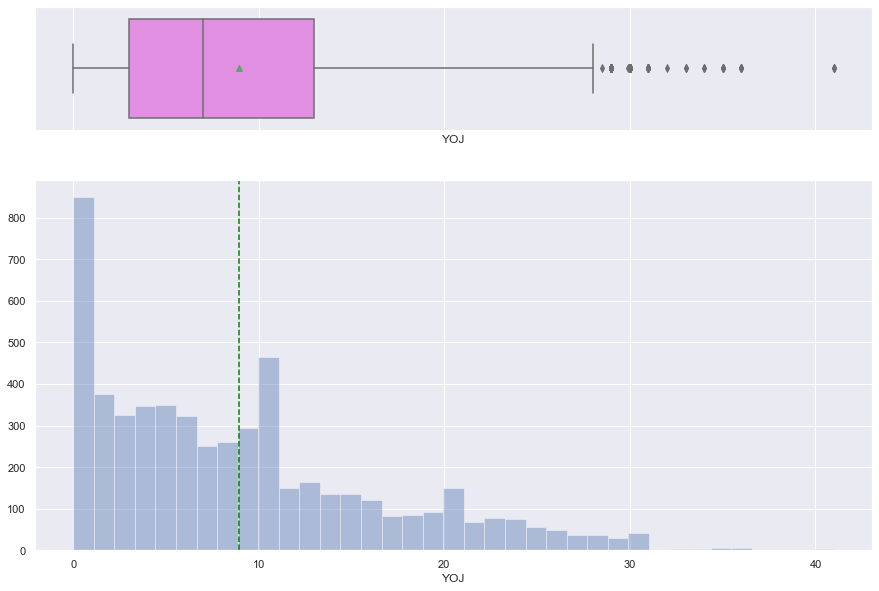

In [20]:
histogram_boxplot(data['YOJ'])

**Insights:** Dataset exhibits exponential decay type.

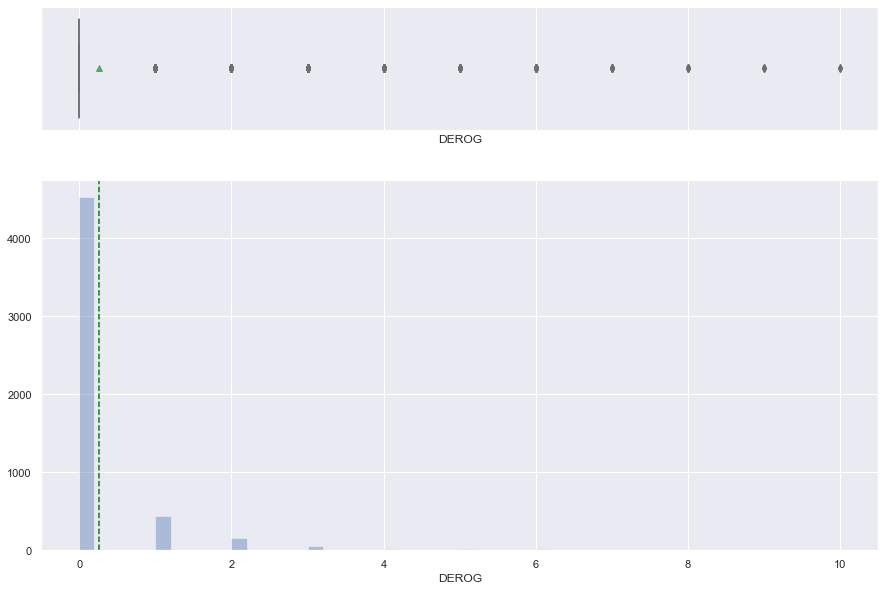

In [21]:
histogram_boxplot(data['DEROG'])

**Insights:** Dataset is most of zero (0) value.

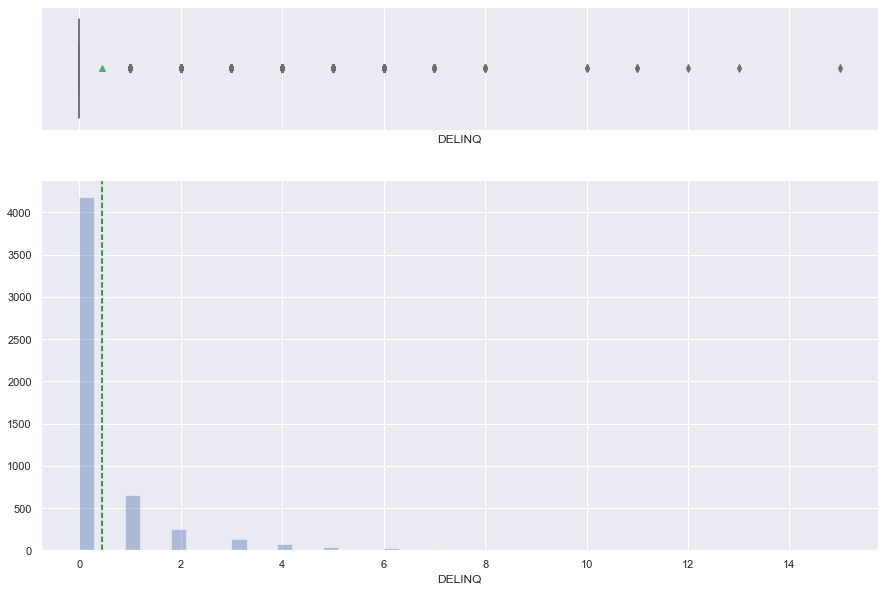

In [22]:
histogram_boxplot(data['DELINQ'])

**Insights:** Dataset is most zero (0) value type.

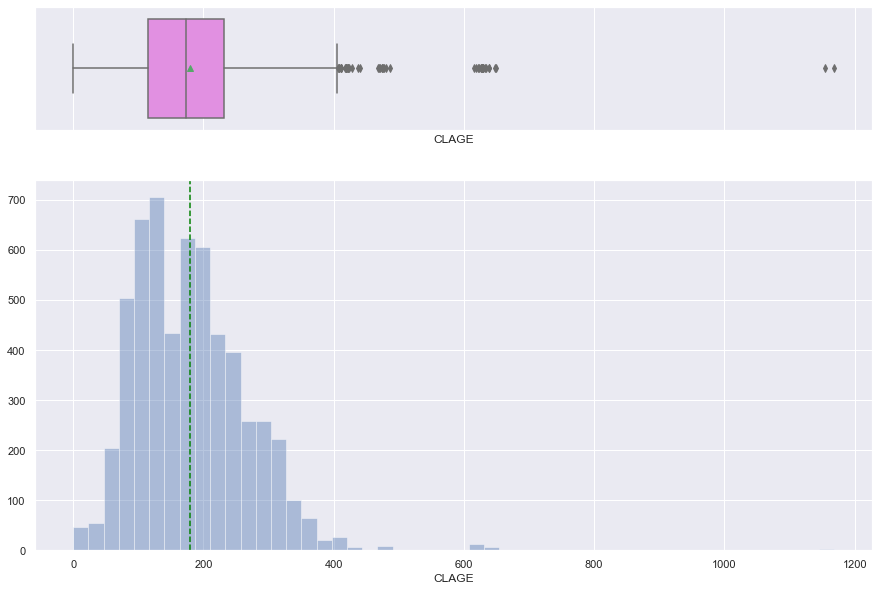

In [23]:
histogram_boxplot(data['CLAGE'])

**Insights:** Dataset is skewed to the right. The two data on the far right might be an outlier or an error.

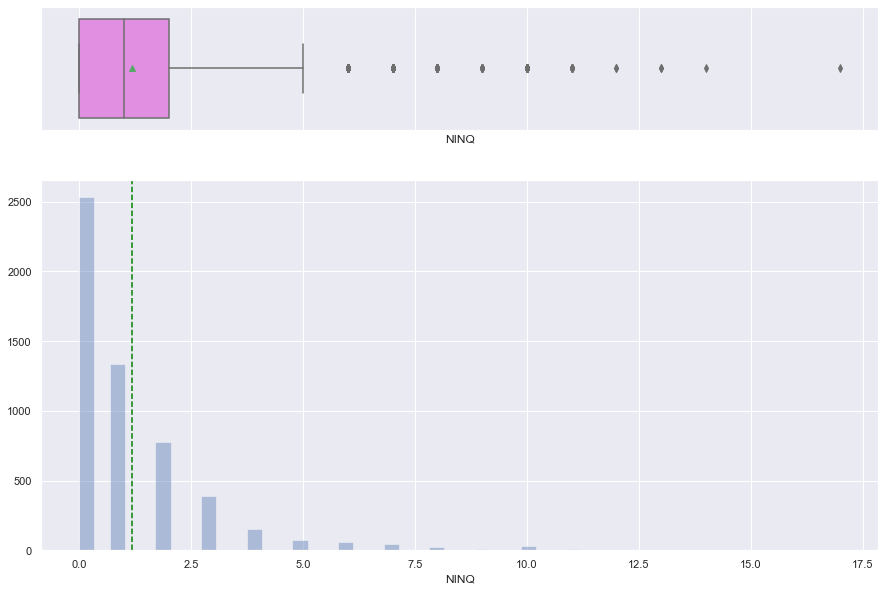

In [24]:
histogram_boxplot(data['NINQ'])

**Insights:** Dataset exhibits exponential decay.

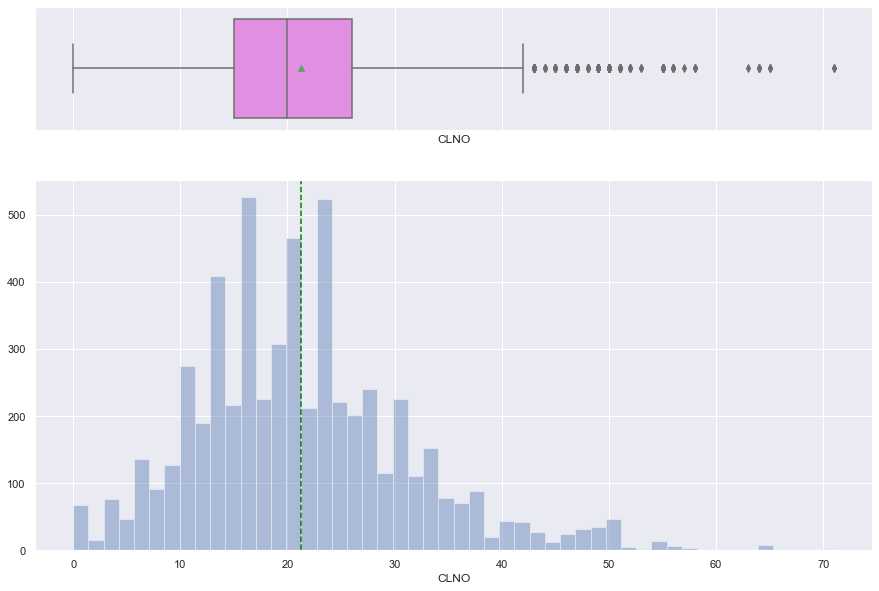

In [25]:
histogram_boxplot(data['CLNO'])

**Insights:** Dataset appears normally distributed.

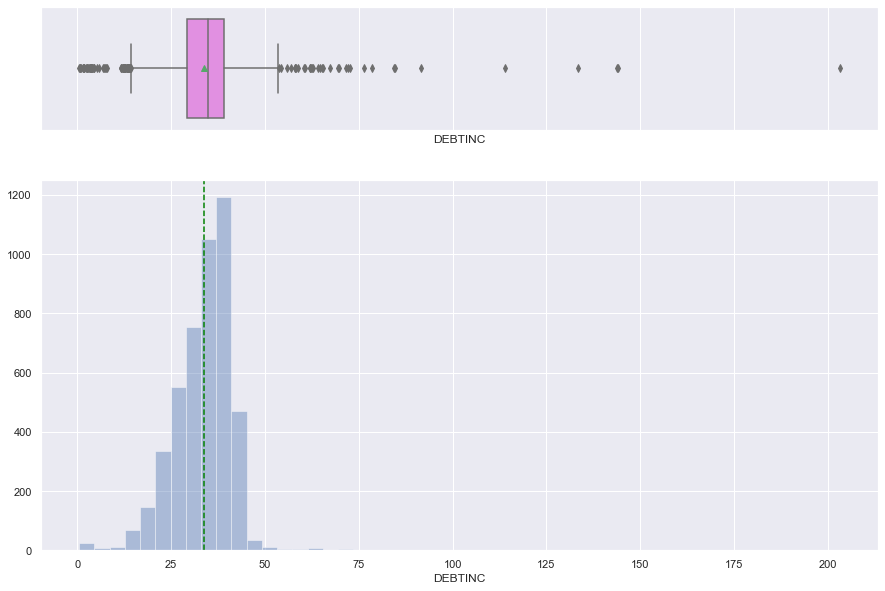

In [26]:
histogram_boxplot(data['DEBTINC'])

**Insights:** Dataset appers to be skewed to the left with some ouliers on the right

### **2. Univariate Analysis - Categorical Data**

In [27]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for BAD

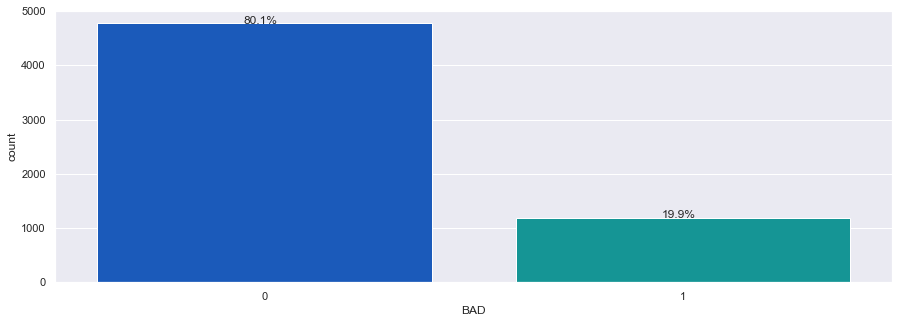

In [28]:
#Build barplot for BAD

plt.figure(figsize=(15,5))
ax = sns.countplot(data["BAD"],palette='winter')
perc_on_bar(ax,data["BAD"])

*Insights:** 80.1% people paid off their loan. Only 19.9% could not pay off their loan. 

#### Analyze Barplot for Reason

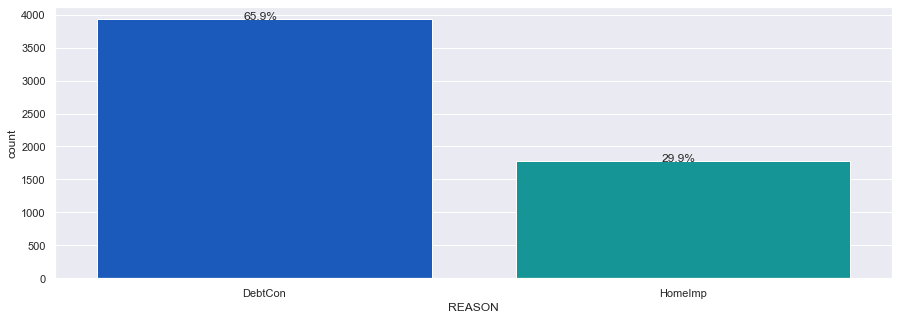

In [29]:
#Build barplot for Reason

plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

*Insight:** 70% of the loan request were for DebtCon (taking out a new loan to pay off other liabilities and consumer debts) and 30% were for HomeImp (home improvement)

#### Analyze Barplot for JOB

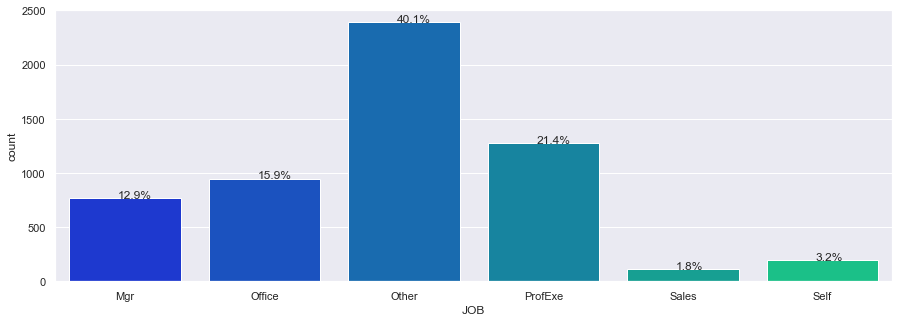

In [30]:
#Build barplot for Job

plt.figure(figsize=(15,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

**Insight:** Most of the job type were Other followed by Professional executive, office, manager...

#### Analyze Barplot for DELINQ

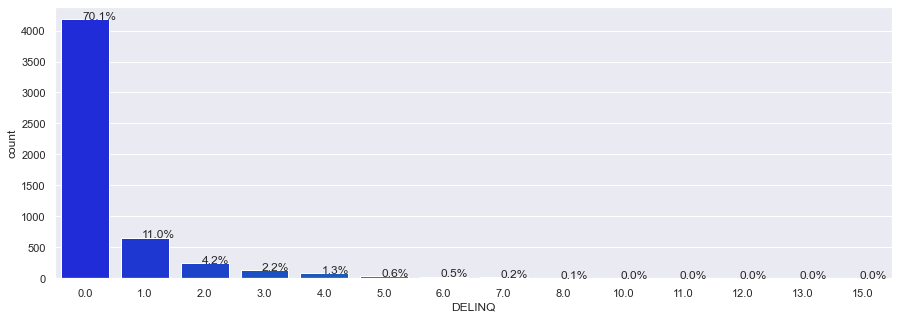

In [31]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights:** 70% people do not have any delinquency. 11% people have 1 delinquency. Less than 1% of people have delinquency greater than 5. At max some people have 8 delinquency.

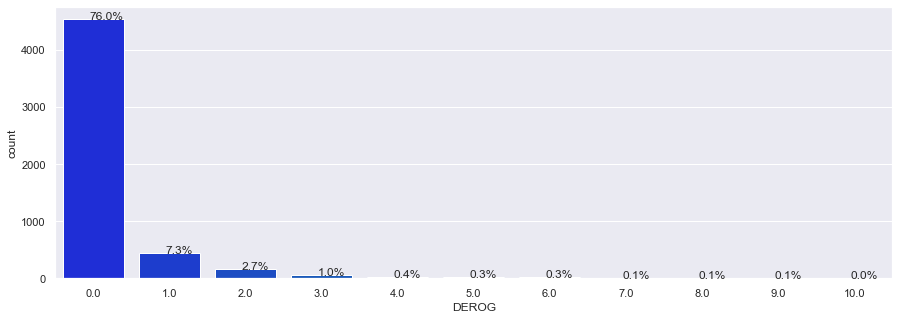

In [32]:
#Build barplot for DEROG

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

**Insights:** 76% people do not have any derogatory report. 7.3% have 1 derogatory report. Less than 1% have more than 4 derogatory report.

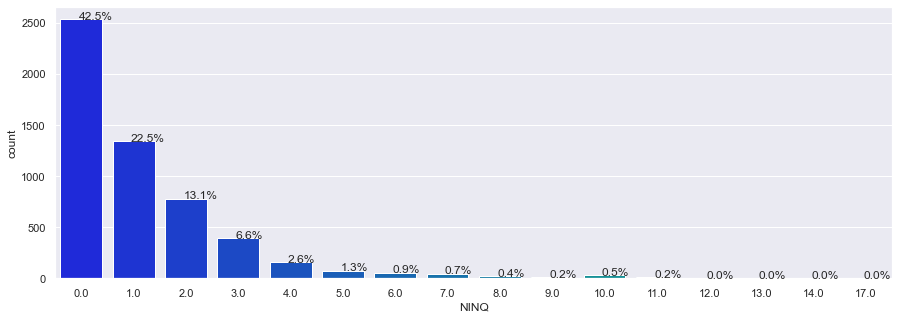

In [33]:
#Build barplot for NINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["NINQ"],palette='winter')
perc_on_bar(ax,data["NINQ"])

**Insights:** 42.5% people do not have any recent credit inquiry. 22.5% have 1 credit inquiry. The number of credit inquiry goes down. Less than 1% have more than 8 credit enquiry.

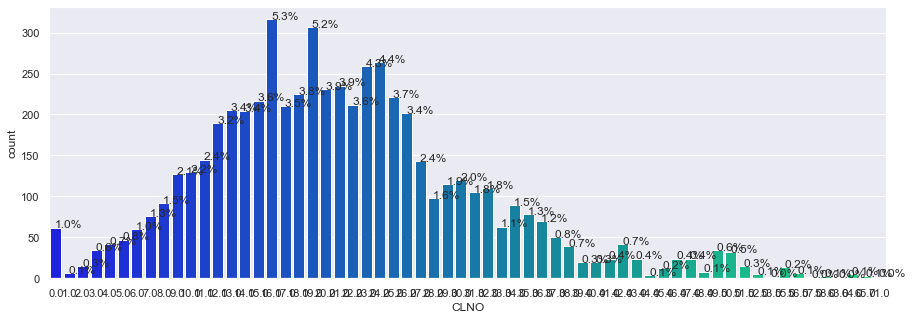

In [34]:
#Build barplot for CLNO

plt.figure(figsize=(15,5))
ax = sns.countplot(data["CLNO"],palette='winter')
perc_on_bar(ax,data["CLNO"])

**Insights:** The number of existing credit line exhibits a normal distribution that is skewed to the right.

## **Bivariate Analysis: Analyzing BAD versus Numerical Variables**

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

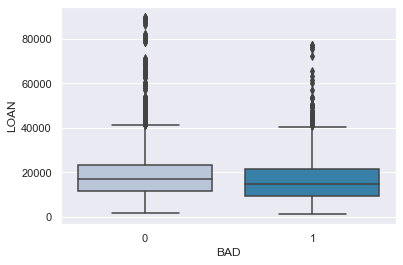

In [35]:
# Analyze BAD vs Loan
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

**Insights**:

- The distribution of people how paid their loan (0) and who defaulted (1) appears somewhat simialar. Because it is similar, it does not appear LOAN will have a significant impact in distinguishing between customer who will default and who will repay their loan. 

-  The only major difference was those who took loans greater than 80,000 paid it back.

<AxesSubplot:xlabel='BAD', ylabel='MORTDUE'>

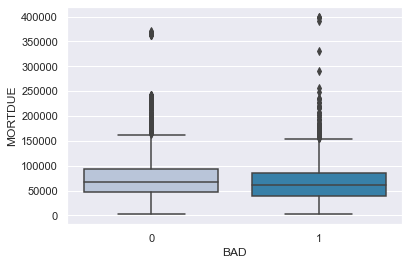

In [36]:
#BAD vs. MORTDUE
sns.boxplot(data["BAD"],data['MORTDUE'],palette="PuBu")

**Insights:**

- The distribution of people how paid their mortgage (0) and who defaulted (1) appears somewhat simialar. Because it is similar, it does not appear MORTDUE will have a significant impact in distinguishing between customer who will default and who will repay their loan. 

- The only major difference was those who took mortgage greater than around 380,000 defaulted.

<AxesSubplot:xlabel='BAD', ylabel='VALUE'>

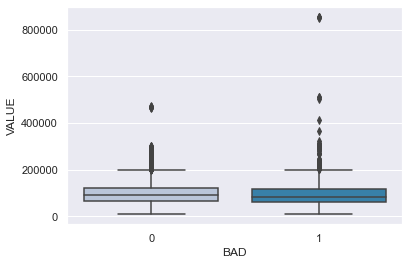

In [37]:
#BAD vs. VALUE
sns.boxplot(data["BAD"],data['VALUE'],palette="PuBu")

**Insights:**

- The distribution of property value and people who paid their loan (0) and who defaulted (1) appears similar up to around USD500,000. Abouve USD800,000 most people defaulted on their loan. Because it is similar, it does not appear VALUE will have a significant impact in distinguishing between customer who will default and who will repay their loan. 

<AxesSubplot:xlabel='BAD', ylabel='YOJ'>

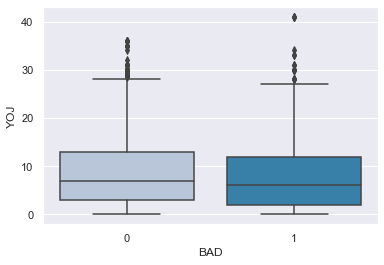

In [38]:
#BAD vs. YOJ
sns.boxplot(data["BAD"],data['YOJ'],palette="PuBu")

**Insights:**

- The distribution of people year on job and those who paid their loan (0) and who defaulted (1) appears somewhat simialar. Because it is similar, it does not appear YOJ will have a significant impact in distinguishing between customer who will default and who will repay their loan. 
- The only difference was those who were on the job for more than 40 years defaulted.

<AxesSubplot:xlabel='BAD', ylabel='DEROG'>

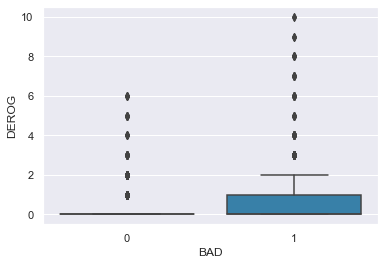

In [39]:
#BAD vs. DEROG
sns.boxplot(data["BAD"],data['DEROG'],palette="PuBu")

**Insights:**

- People who defaulted on their loan (1) had far greater number of derogatory credit reports than people who paid their loan (0). Because it is veruy dissimilar, it appears DEROG will have a significant impact in distinguishing between customer who will default and who will repay their loan. 

<AxesSubplot:xlabel='BAD', ylabel='DELINQ'>

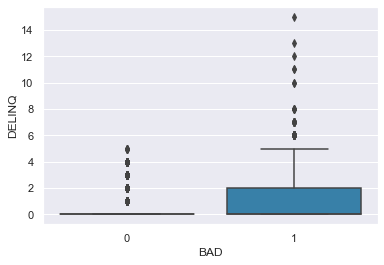

In [40]:
#BAD vs. DELINQ
sns.boxplot(data["BAD"],data['DELINQ'],palette="PuBu")

**Insights:**

- People who defaulted on their loan (1) had far greater number of delinquent credit lines than people who paid their loan (0). Because it is very dissimilar, it appear DELINQ will have a significant impact in distinguishing between customer who will default and who will repay their loan. 

<AxesSubplot:xlabel='BAD', ylabel='CLAGE'>

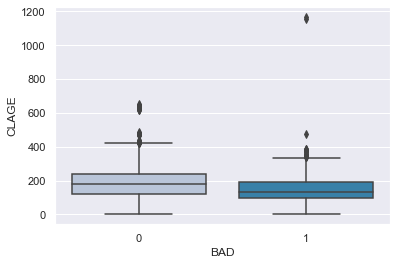

In [41]:
#BAD vs. CLAGE
sns.boxplot(data["BAD"],data['CLAGE'],palette="PuBu")

**Insights:**

- People with higher age of old credit line appears pay off their loan with some exception on some people with very high age of old credit line.Because it is similar, it does not appear CLAGE will have a significant impact in distinguishing between customer who will default and who will repay their loan. 

<AxesSubplot:xlabel='BAD', ylabel='NINQ'>

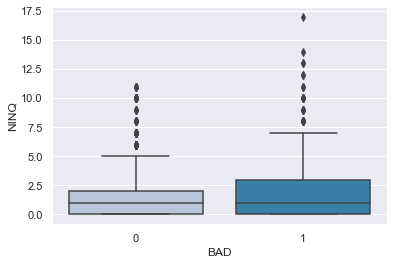

In [42]:
#BAD vs. NINQ
sns.boxplot(data["BAD"],data['NINQ'],palette="PuBu")

**Insights:**

- People with higher Number of recent credit inquiries appears default slightly more. The distribution in most part can be regarded similar. Because it is similar, it does not appear NINQ will have a significant impact in distinguishing between customer who will default and who will repay their loan. 

<AxesSubplot:xlabel='BAD', ylabel='CLNO'>

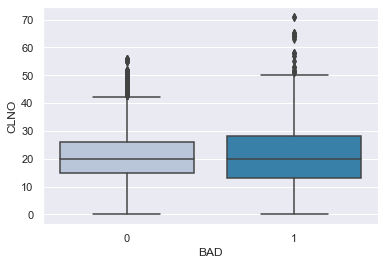

In [43]:
#BAD vs. CLNO
sns.boxplot(data["BAD"],data['CLNO'],palette="PuBu")

**Insights:**

- People with higher number of existing credit lines appears default slightly more. The distribution in most part can be regarded similar. Because it is similar, it does not appear CLNO will have a significant impact in distinguishing between customer who will default and who will repay their loan. 

<AxesSubplot:xlabel='BAD', ylabel='DEBTINC'>

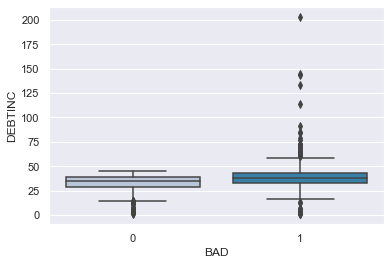

In [44]:
#BAD vs. DEBTINC
sns.boxplot(data["BAD"],data['DEBTINC'],palette="PuBu")

**Insights:**

- People with high Debt-to-income ratio appears default more. Because it is very dissimilar, it appear DEBTINC will have a significant impact in distinguishing between customer who will default and who will repay their loan. 

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

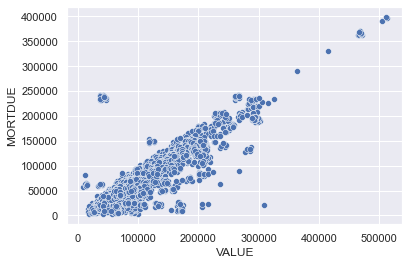

In [45]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Insights:** There appears to be some positive correlation between MORTDUE and VALUE

<AxesSubplot:xlabel='VALUE', ylabel='LOAN'>

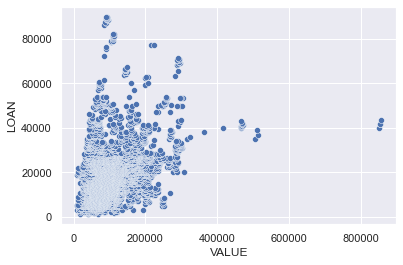

In [46]:
#VALUE vs. Loan
sns.scatterplot(data["VALUE"],data['LOAN'],palette="PuBu")

**Insights:** There does not appears to be storng correlation between Loan and VALUE

<AxesSubplot:xlabel='MORTDUE', ylabel='LOAN'>

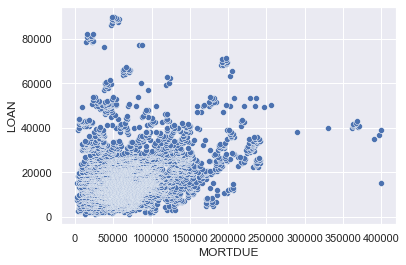

In [47]:
#MORTDUE vs. Loan
sns.scatterplot(data["MORTDUE"],data['LOAN'],palette="PuBu")

**Insights:** There does not appears to be storng correlation between Loan and MORTDUE

<AxesSubplot:xlabel='DEROG', ylabel='DELINQ'>

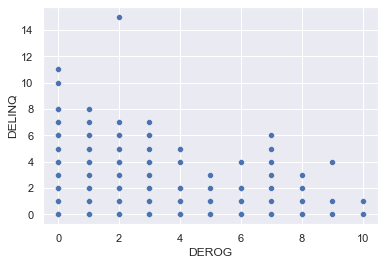

In [48]:
#DEROG vs. DELINQ
sns.scatterplot(data["DEROG"],data['DELINQ'],palette="PuBu")

**Insights:** There appears to a weak negative correlation between DELINQ and DEROG.

<AxesSubplot:xlabel='YOJ', ylabel='LOAN'>

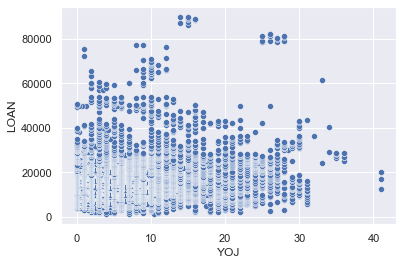

In [49]:
#LOAN vs. YOJ
sns.scatterplot(data["YOJ"],data['LOAN'],palette="PuBu")

**Insights:** There appears to no correlation between LOAN and YOJ.

### **Bivariate Analysis:  Analyzing BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [50]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


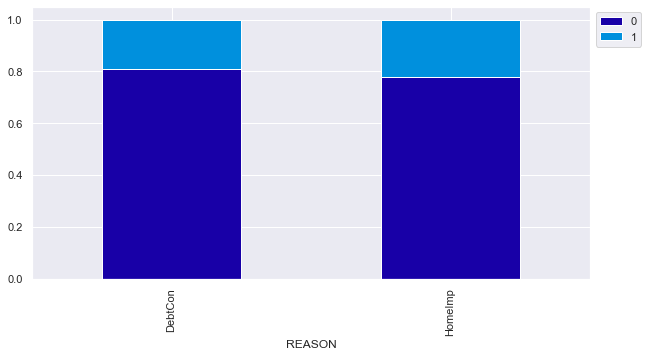

In [51]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights:**

- Almost 80% of people with Reason DebtCon or HomeImp paid off their loan.

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


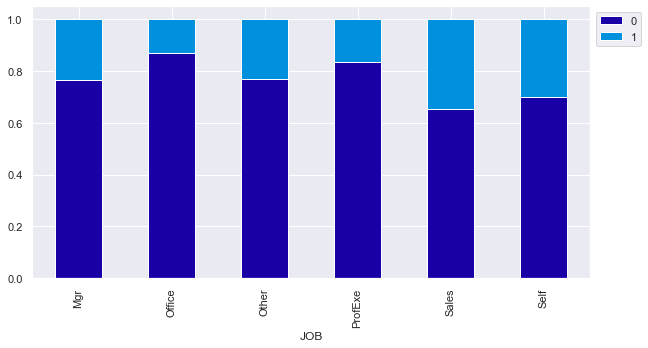

In [52]:
# Plot stacked bar plot for BAD and JOB
stacked_plot(data['JOB'])

**Insights:**

- Over 60% of people with any job paid off their laon. 
- The highest type of job holder that defaulted was Sales.
- The highest type of job holder that paid off their loan were Office.

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

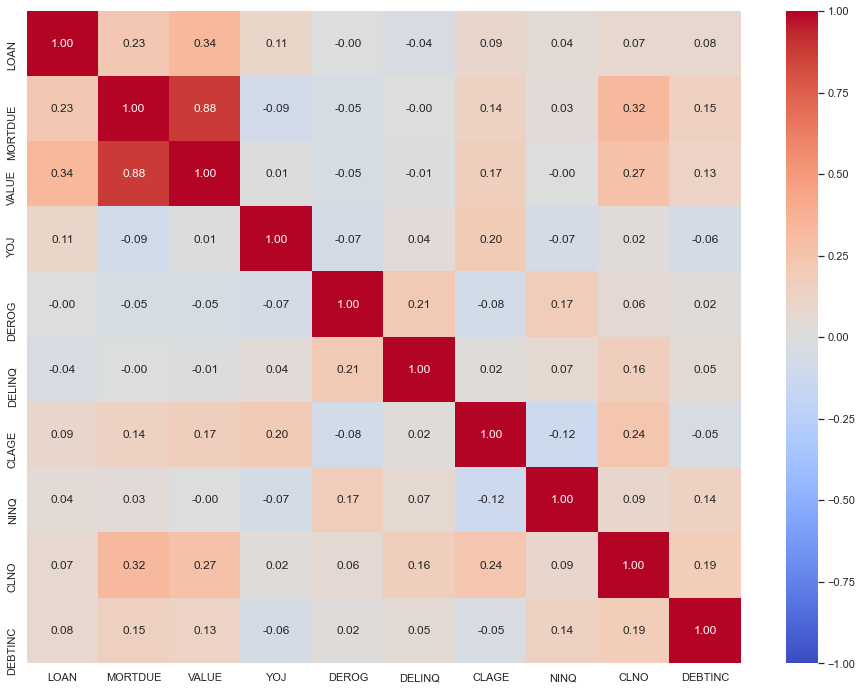

In [53]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',annot = True, vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

**Insight:**

- The heat map shows that there is a very storng positive correlation between MORTDUE and VALUE.

In [54]:
# Build pairplot for the data with hue = 'BAD'

#sns.pairplot(data, hue="BAD") # This command takes too long time so put a # in front for now

### Treating Outliers

In [55]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df.quantile(0.25) # 25th quantile
    Q3=df.quantile(0.75)  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1-1.5*IQR  #define lower whisker
    Upper_Whisker = Q3+1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [56]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values 

In [57]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [58]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

#### Filling missing values in numerical columns with median and mode in categorical variables

In [59]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist() #df.select_dtypes('object')

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with mode.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

In [60]:
(data.isnull().sum()/data.shape[0])*100

BAD        0.0
LOAN       0.0
MORTDUE    0.0
VALUE      0.0
REASON     0.0
JOB        0.0
YOJ        0.0
DEROG      0.0
DELINQ     0.0
CLAGE      0.0
NINQ       0.0
CLNO       0.0
DEBTINC    0.0
dtype: float64

## Step 3: Model Building

### **Separating the target variable from other variables**

In [61]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = data.drop(['BAD'], axis=1)

# Create dummy variables for the categorical variables
X = pd.get_dummies(X, drop_first=True)

# Create y(dependent varibale)

y = data["BAD"]

### **Splitting the data into 70% train and 30% test set**

In [62]:
# Split the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (4172, 16)
X_test (1788, 16)
y_train (4172,)
y_test (1788,)


## **Model Evaluation Criterion**
#### Since this is a binary classification problem, the model can make wrong predictions in one of two ways:
1. Predicting a customer will default (BAD = 1) when the customer will actually not default - Loss of opportunity and this is False Positive. 
2. Predicting a customer will not default (BAD = 0) when the customer will actually default - Financial loss and this is False Negative

#### Which case is more important? 
* The second case, predicting that the customer will not default when they will actually default. This would result in financial loss to the company.

#### How to reduce this loss i.e need to reduce False Negatives?
* In classification, the class of interest is considered the positive class. Here, the class of interest is 1 i.e. identifying customers who will default on their loan, i.e., BAD = 1. So, the company wants to minimize the number of false negatives, in other words **Recall** is the evaluation criterion to be maximized.

In [63]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Loan Repaid', 'Defaulted'], yticklabels=['Loan Repaid', 'Defaulted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Logistic Regression Model** 

In [64]:
# Defining the Logistic regression model

lr=LogisticRegression(random_state=1)

# Fitting the model on the training data 

lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.72      0.03      0.06       817

    accuracy                           0.81      4172
   macro avg       0.77      0.51      0.48      4172
weighted avg       0.79      0.81      0.73      4172



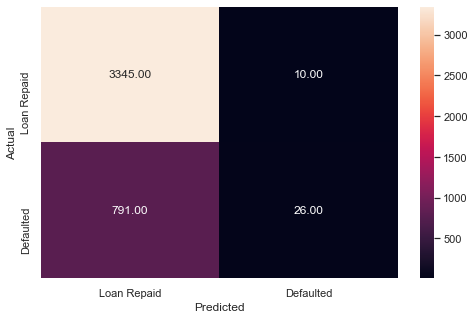

In [65]:
#Predict for train set
y_pred_train = lr.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.50      0.01      0.02       372

    accuracy                           0.79      1788
   macro avg       0.65      0.50      0.45      1788
weighted avg       0.73      0.79      0.70      1788



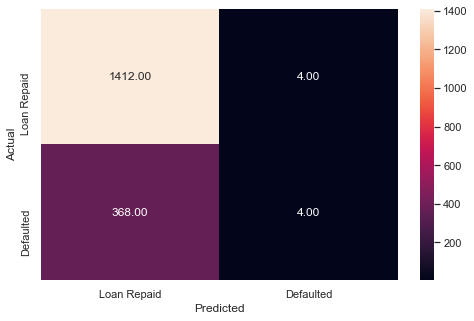

In [66]:
#Predict for test set

y_pred_test = lr.predict(X_test)
y_prob_test = lr.predict_proba(X_test)

#checking the performance on the test dataset

metrics_score(y_test, y_pred_test)

**Reading the confusion matrix (clockwise):**

* True Negative (Actual=0, Predicted=0): Model predicts that a customer repaid loan (BAD=0) and the customer actually repaid loan (BAD=0).

* False Positive (Actual=0, Predicted=1): Model predicts that a customer defaulted (BAD=1) but the customer actually repaid loan (BAD=0).

* False Negative (Actual=1, Predicted=0): Model predicts that a customer repaid loan (BAD=0) but the customer actually defaulted (BAD=0).

* True Positive (Actual=1, Predicted=1): Model predicts that a customer defaulted (BAD=1) and the customer actually defaulted (BAD=1).

**Observations:**
- **We are getting an accuracy of around 80%** on train and test dataset for class 0, i.e., BAD=0.
- However, **the recall for this model is only around 3% for class 1 (BAD=1) on train and 1% on test.**
- As the recall is very low, **this model will not perform well** in differentiating out those customer who have a high chance of defaulting, meaning it will eventually not help in correctly identifying customers that will default. 
- As we can see from the Confusion Matrix, **this model fails to identify the majority of customer who will default.**

In [67]:
# Plot ROC curce

def plot_roc_curve(fpr, tpr):

    plt.figure(figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')


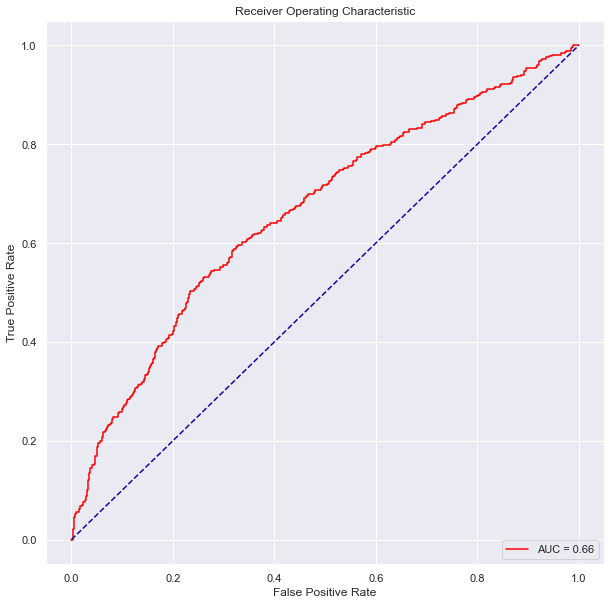

In [68]:
#Plotting ROC for Logistic Regression
fpr, tpr, thresholds  = roc_curve(y_test, y_prob_test[:,1])
lr_roc_auc = auc(fpr, tpr)
roc_auc=lr_roc_auc
plot_roc_curve(fpr, tpr)

#### The AUC (area under the curve) tells how much the model is capable of distinguishing between classes
- Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [69]:
# Printing the coefficients of logistic regression

pd.Series(lr.coef_[0], index=X_train.columns).sort_values(ascending = False)

DEBTINC           0.019399
CLNO              0.006334
DELINQ            0.006116
NINQ              0.004655
DEROG             0.003886
JOB_Self          0.000155
REASON_HomeImp    0.000111
JOB_Sales         0.000111
JOB_Other         0.000040
VALUE             0.000001
MORTDUE          -0.000007
LOAN             -0.000027
JOB_ProfExe      -0.000206
JOB_Office       -0.000434
YOJ              -0.002991
CLAGE            -0.007872
dtype: float64

**Observations:**


**Features which positively affect Default (BAD=0) in desending order are:**
-DEBTINC: Debt-to-income ratio. **This has the highest impact**
-CLNO: Number of existing credit lines. 
-DELINQ: Number of delinquent credit lines. 
-NINQ: Number of recent credit inquiries.
-DEROG: Number of major derogatory reports
-JOB_SELF: Job type, "Self employed"
-REASON_HomeImp: Reason type, "Home improvement"
-JOB_Sales: Job type, "Sales"
-JOB_Other: Job type, "Other"
-VALUE: Current value of the property.

**Features which negatively affect Default (BAD=0) in desending order are:**
-MORTDUE: Amount due on the existing mortgage.
-LOAN: Amount of loan approved.
-JOB_ProfExe: Job type, "Professional executive"
-JOB_Office: Job type, "Office"
-YOJ: Years at present job.
-CLAG: Age of the oldest credit line in months. **This has the highest impact on Loan repayment**


### **Decision Tree Model**

#### Data Preparation for the tree based model

In [70]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)
    

In [71]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}


dt=DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

In [72]:
#fitting Decision tree model

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



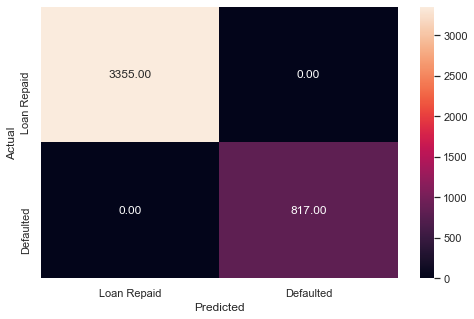

In [73]:
# Checking performance on the training data

y_train_pred_dt = dt.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1416
           1       0.70      0.62      0.66       372

    accuracy                           0.87      1788
   macro avg       0.80      0.77      0.79      1788
weighted avg       0.86      0.87      0.86      1788



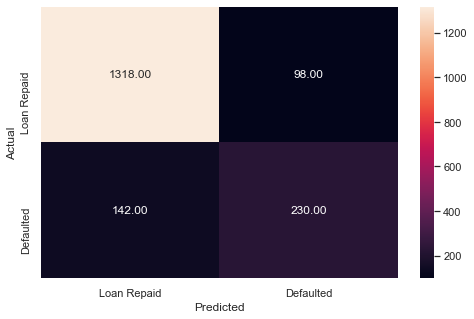

In [74]:
# Checking performance on the testing data


y_test_pred_dt = dt.predict(X_test)
y_test_prob_dt = dt.predict_proba(X_test)
metrics_score(y_test, y_test_pred_dt)

**Observations:**
- There is a big difference in performance between the train and test data. The train data fits the model perfectly but this data when applied to the test does not give perfect results. This implies the model is over fitting. Need to perform hyperparameter tuning the decision tree to acurately predict on the test dataset. 

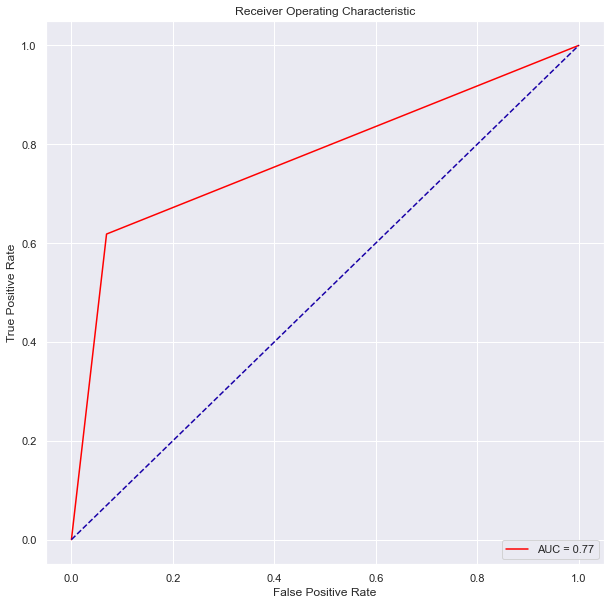

In [75]:
#Plotting ROC for Decision Tree
fpr, tpr, thresholds  = roc_curve(y_test, y_test_prob_dt[:,1])
dt_roc_auc = auc(fpr, tpr)
roc_auc=dt_roc_auc
plot_roc_curve(fpr, tpr)

**Insights Over fitting**

### **Decision Tree - Hyperparameter Tuning**



In [76]:
# Choose the type of classifier. 

from sklearn.metrics import make_scorer
dt_tuned = DecisionTreeClassifier(random_state=1)


# Grid of parameters to choose from

parameters = {'criterion': ['entropy'], # entropy better than Gini
             'max_depth': np.arange(3, 7), # depth 5 is optimal in (1,10) range
             'min_samples_leaf': np.arange(6,10), # leaf size 8 optimal in (1,10) range
             'min_samples_split': np.arange(2,5) # split 2 is optimal in (2,5) range
             }


# Type of scoring used to compare parameter combinations

#scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)} #Had to import make_scorer. If use this then also have to include refit="AUC", return_train_score=True,
scorer = metrics.make_scorer(recall_score, pos_label=1) #taken from week 5 case study employee attrition


# Run the grid search

dt_grid = GridSearchCV(dt_tuned, parameters, scoring = scorer, cv=5)


# Fit the GridSearch on train dataset

dt_grid = dt_grid.fit(X_train, y_train)


# Set the clf to the best combination of parameters

dt_tuned = dt_grid.best_estimator_


# Fit the best algorithm to the data. 

dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=8,
                       random_state=1)

In [77]:
print(dt_grid.best_params_) # Printing the best parameters from Grid Search CV result

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}


#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3355
           1       0.72      0.71      0.72       817

    accuracy                           0.89      4172
   macro avg       0.82      0.82      0.82      4172
weighted avg       0.89      0.89      0.89      4172



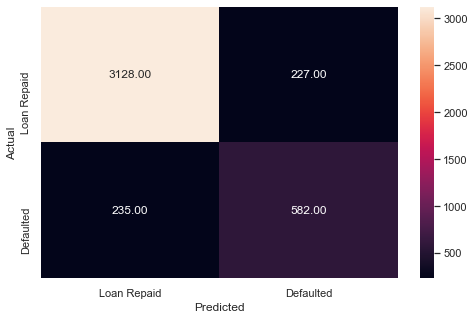

In [78]:
# Checking performance on the training data based on the tuned model


y_train_pred_dt_tuned = dt_tuned.predict(X_train)
metrics_score(y_train, y_train_pred_dt_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1416
           1       0.75      0.68      0.71       372

    accuracy                           0.89      1788
   macro avg       0.83      0.81      0.82      1788
weighted avg       0.88      0.89      0.88      1788



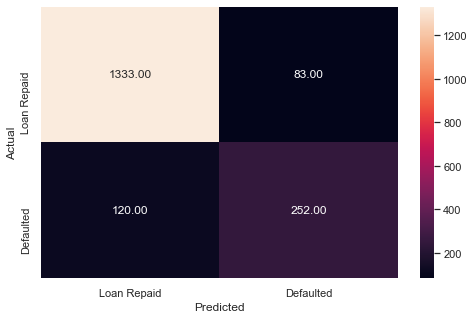

In [79]:
# Checking performance on the testing data based on the tuned model

y_test_pred_dt_tuned = dt_tuned.predict(X_test)
y_test_prob_dt_tuned = dt_tuned.predict_proba(X_test)
metrics_score(y_test, y_test_pred_dt_tuned)


**Observations:**
- **We are getting an accuracy of around 92%** on train and test dataset for class 0, i.e., BAD=0.
- However, **the recall for this model is only around 71% for class 1 (BAD=1) on train and 68% on test.**
- The recall is much better than the logistic regression model, **this model performs better than logistic regression** in differentiating out those customer who have a high chance of defaulting compared to logistic regression. 
- Need to explore other models that may achieve higher Recall. 

**Observations:**
- There is a big difference in performance between the train and test data. The train data fits the model perfectly but this data when applied to the test does not give perfect results. This implies the model is over fitting. Need to perform hyperparameter tuning the random forest to acurately predict on the test dataset. 

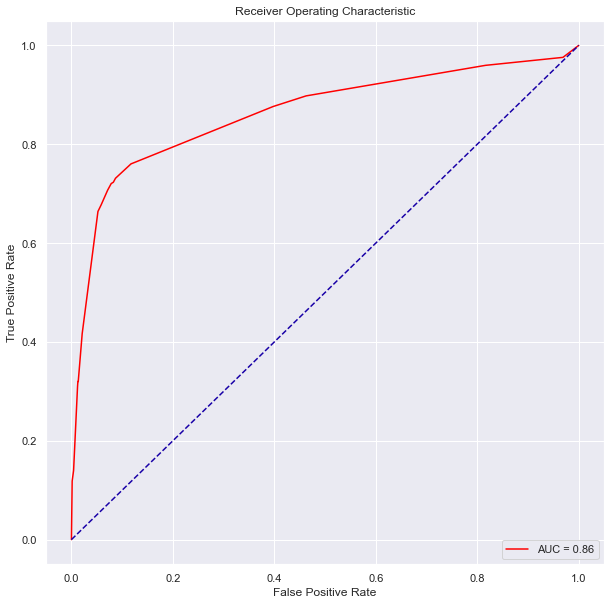

In [80]:
#Plotting ROC for Decision Tree Tuned
fpr, tpr, thresholds  = roc_curve(y_test, y_test_prob_dt_tuned[:,1])
dttuned_roc_auc = auc(fpr, tpr)
roc_auc=dttuned_roc_auc
plot_roc_curve(fpr, tpr)

**Insights:**

- The Area Under Curve is higher than previous two models, logistic regression and Decision Tree without hyperparameter tuning.

#### Plotting the Decision Tree

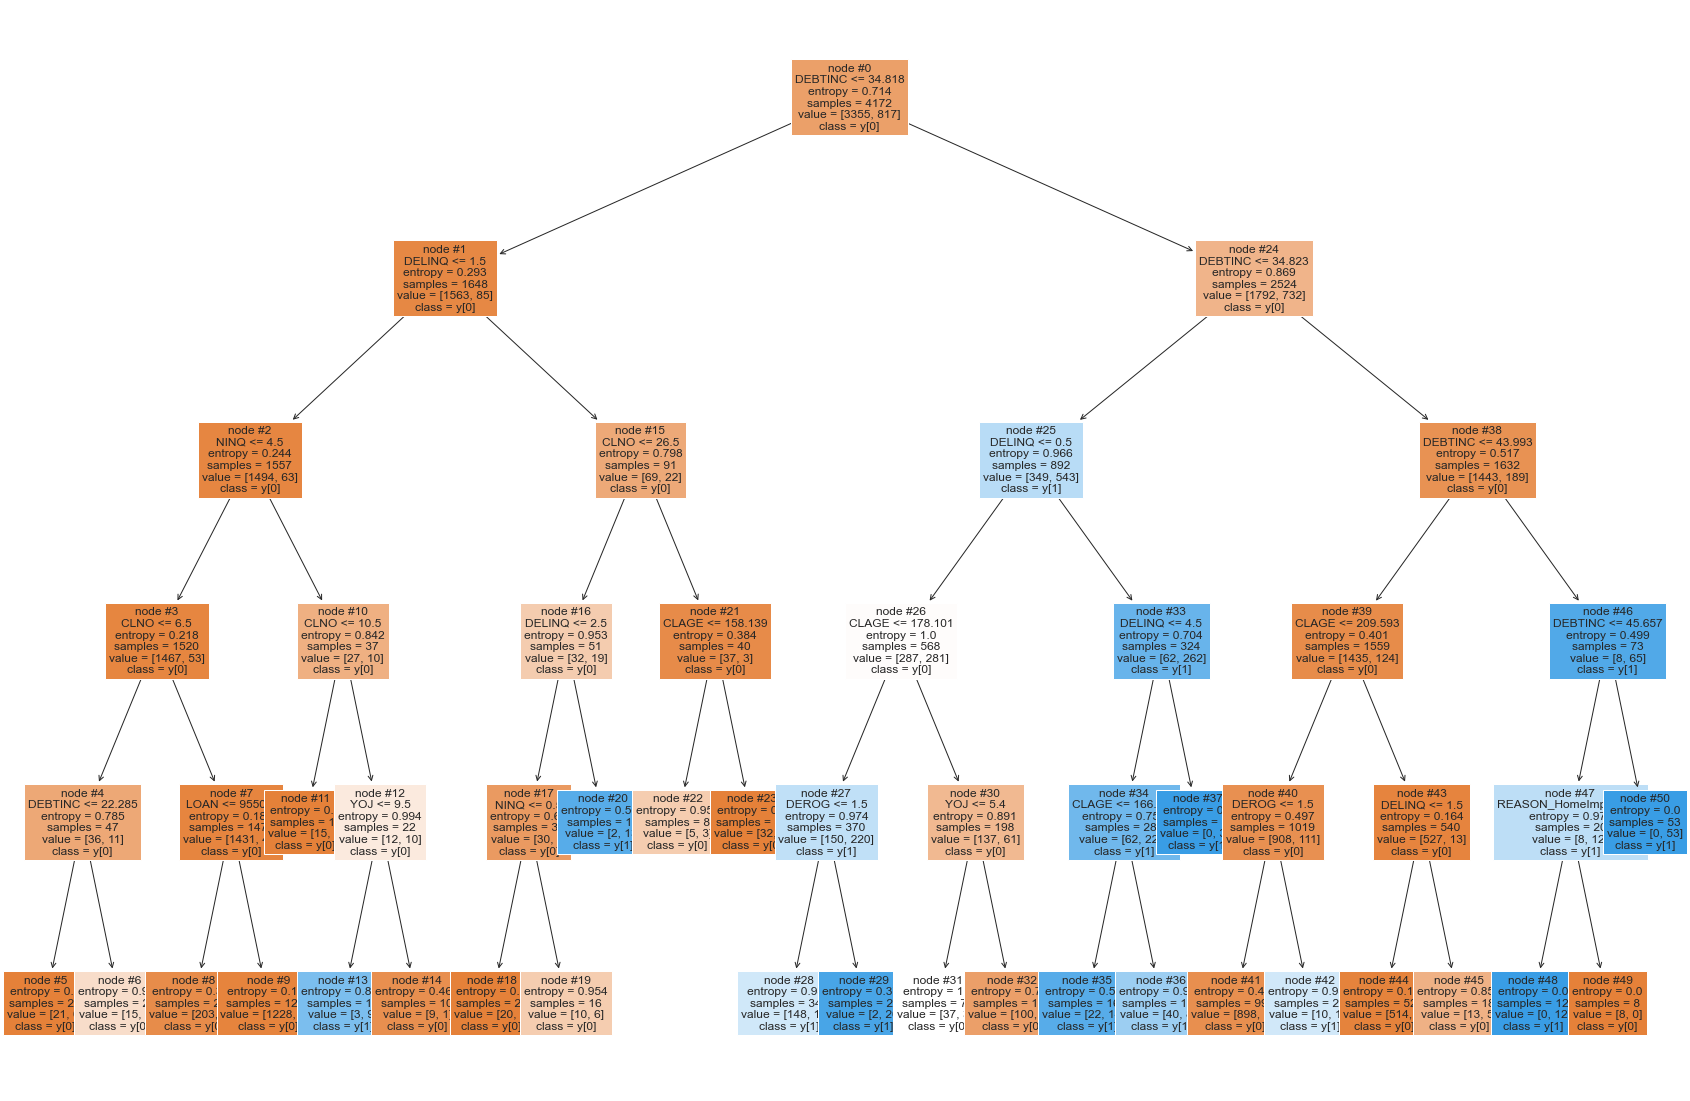

In [81]:
# Plot the decision  tree and analyze it to build the decision rule

features = list(X.columns)

plt.figure(figsize=(30,20))

tree.plot_tree(dt_tuned,max_depth=5,feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

### Deduce the business rules apparent from the Decision Tree and write them down:
 **Understanding the decision tree:**
- The first line of each node (except those of the final row) shows the splitting condition in the form "feature <= value". 
- The second line shows the entropy value of the node. Here entropy gave better results than Gini so we used entropy. 
- The third line samples is the number of observation
- The fourth line is the "Value". This shows the class distribution of the samples (Loan repaid, Defaulted)
- The fifth line shows the class. It always shows the predominant class for each split. y=0 indicates loan repaid and y=1 indicates default

**Understanding the split:**
- The most important attribute is placed at the root node. Here the most important attribute is DEBITINC. The second node is based on DELINQ

### **Random Forest Classifier**



In [82]:
# Defining Random forest CLassifier

rf=RandomForestClassifier( random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



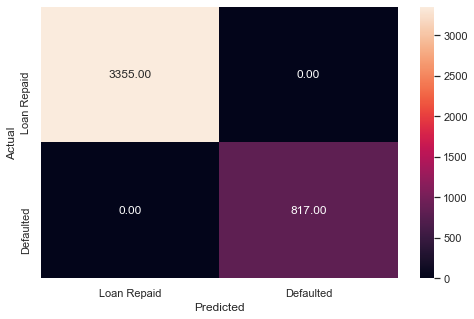

In [83]:
#Checking performance on the training data
y_pred_train_rf=rf.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.91      0.69      0.79       372

    accuracy                           0.92      1788
   macro avg       0.92      0.84      0.87      1788
weighted avg       0.92      0.92      0.92      1788



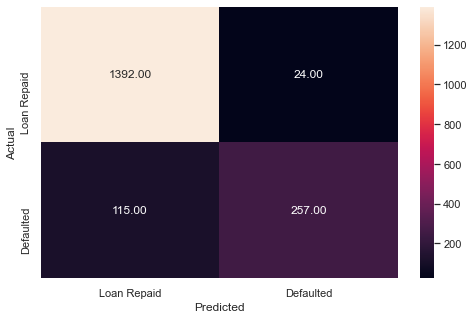

In [84]:
# Checking performance on the test data

y_test_pred_rf = rf.predict(X_test)
y_test_prob_rf = rf.predict_proba(X_test)
metrics_score(y_test, y_test_pred_rf)

**Observations:**
- There is a big difference in performance between the train and test data. The train data fits the model perfectly but this data when applied to the test does not give perfect results. This implies the model is over fitting. Need to perform hyperparameter tuning the random forest to acurately predict on the test dataset. 

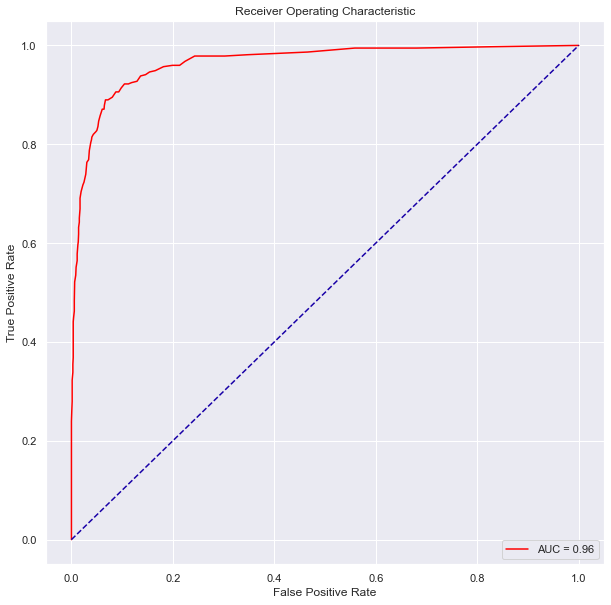

In [85]:
#Plotting ROC for Random Forest
fpr, tpr, thresholds  = roc_curve(y_test, y_test_prob_rf[:,1])
rf_roc_auc = auc(fpr, tpr)
roc_auc=rf_roc_auc
plot_roc_curve(fpr, tpr)

**Observations:** The area under the curve is very high so it does show a good fit but the model is not a good model.

### **Build a Random Forest model with Class Weights**

In [86]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

rf1=RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

# Fitting Random Forest model

rf1.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



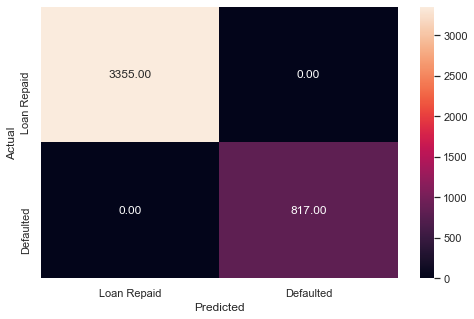

In [87]:
# Checking performance on the train data

y_pred_train_rf1=rf1.predict(X_train)
metrics_score(y_train, y_pred_train_rf1)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.91      0.66      0.76       372

    accuracy                           0.91      1788
   macro avg       0.91      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



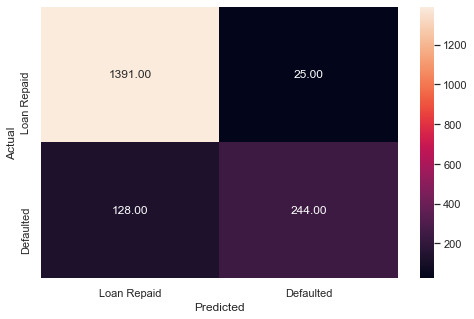

In [88]:
# Checking performance on the test data

y_test_pred_rf1 = rf1.predict(X_test)
y_test_prob_rf1 = rf1.predict_proba(X_test)
metrics_score(y_test, y_test_pred_rf1)

**Observations:**
- There is still a big difference in performance between the train and test data even after adjusting class weight. The train data fits the model perfectly but this data when applied to the test does not give perfect results. This implies the model is over fitting. Need to perform hyperparameter tuning the random forest to acurately predict on the test dataset. 

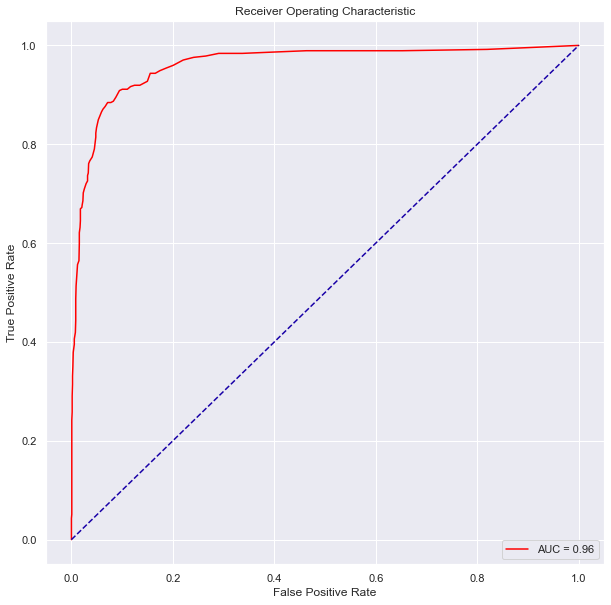

In [89]:
#Plotting ROC for Random Forest 1
fpr, tpr, thresholds  = roc_curve(y_test, y_test_prob_rf1[:,1])
rf1_roc_auc = auc(fpr, tpr)
roc_auc=rf1_roc_auc
plot_roc_curve(fpr, tpr)

### **Tuning the Random Forest**

In [90]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)


# Grid of parameters to choose from
parameter_rf = {
            "n_estimators": np.arange(36,40,2), #100 best in [100, 200]
            "min_samples_split": np.arange(5,7,1), # min split 5 best
            "min_samples_leaf": np.arange(5,7,1), # min leaf 2 best
            "max_features": ['log2'], #log2 best compared to 0.7 and auto
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)


# Run the grid search
rf_grid=GridSearchCV(rf_tuned, parameter_rf, scoring=scorer, cv=5)

#fit the GridSearch on train dataset
rf_grid=rf_grid.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned=rf_grid.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_features='log2',
                       min_samples_leaf=6, min_samples_split=5, n_estimators=36,
                       random_state=1)

In [91]:
print(rf_grid.best_params_) # Printing the best parameters from Grid Search CV result

{'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 36}


#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3355
           1       0.79      0.95      0.86       817

    accuracy                           0.94      4172
   macro avg       0.89      0.95      0.91      4172
weighted avg       0.95      0.94      0.94      4172



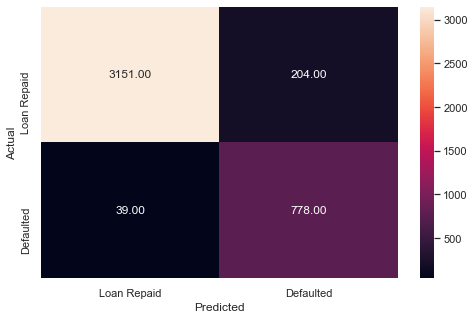

In [92]:
# Checking performance on the training data
y_pred_train_rf_tuned=rf_tuned.predict(X_train)
metrics_score(y_train, y_pred_train_rf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1416
           1       0.75      0.76      0.76       372

    accuracy                           0.90      1788
   macro avg       0.84      0.85      0.85      1788
weighted avg       0.90      0.90      0.90      1788



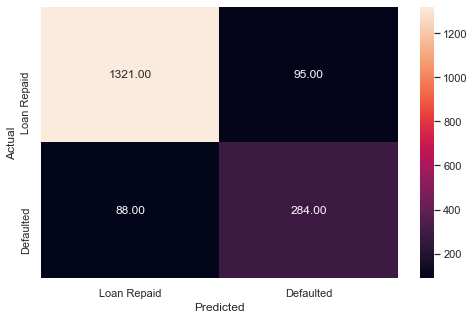

In [93]:
# Checking performace on test dataset

y_test_pred_rf_tuned = rf_tuned.predict(X_test)
y_test_prob_rf_tuned = rf_tuned.predict_proba(X_test)
metrics_score(y_test, y_test_pred_rf_tuned)

**Observations:**
- We are getting an accuracy of around 99% and 94% on train and test dataset, respectively, for class 0, i.e., BAD=0.
- However, the recall for this model is only around 95% for class 1 (BAD=1) on train and 76% on test.
- The recall is much better than the logistic regression and decision tree models, 
- Out of the three models explored, hyperparameter tuning random forest is the best model. . 

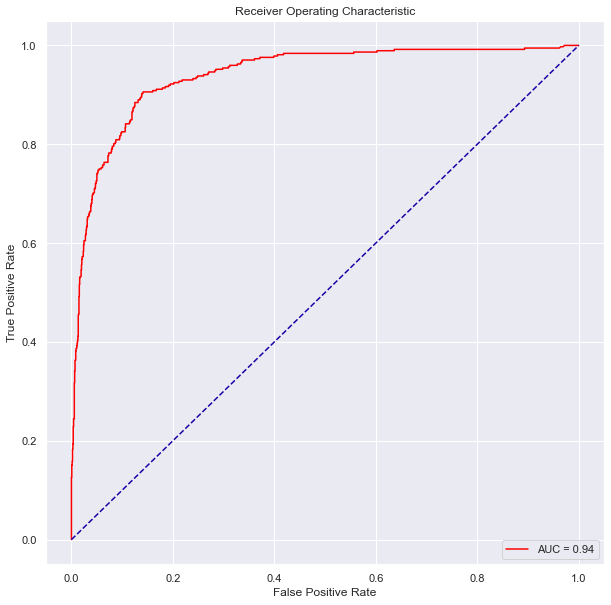

In [94]:
#Plotting ROC for Random Forest 1
fpr, tpr, thresholds  = roc_curve(y_test, y_test_prob_rf_tuned[:,1])
rftuned_roc_auc = auc(fpr, tpr)
roc_auc=rftuned_roc_auc
plot_roc_curve(fpr, tpr)

**Insights: Hyperparameter tuned random forest has AUC = 94%. This model is the best among all explored models here in predicting 0 classes as 0 and 1 classes as 1**

#### Plot the Feature importance of the tuned Random Forest

<AxesSubplot:xlabel='Importance'>

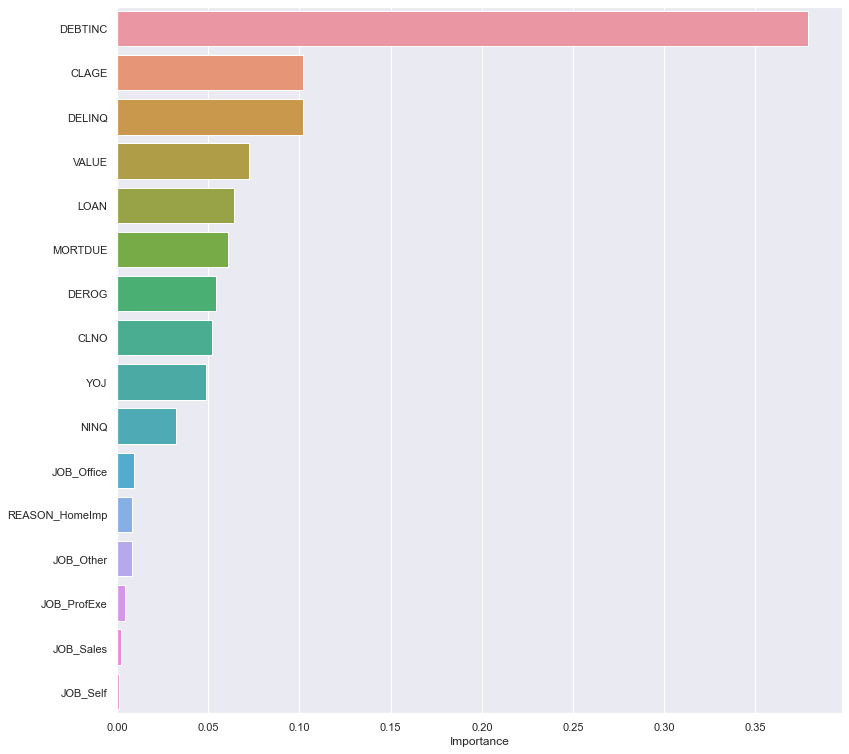

In [95]:
importances = rf_tuned.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index)

### **Comparing Model Performances**

In [96]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [97]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [98]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [99]:
# Make the list of all the model names 

models = [lr, dt, dt_tuned, rf, rf1, rf_tuned] 

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [100]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree', 'Decision Tree Tuned', 'Random Forest', 'Random Forest 1', 'Random Forest Tuned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.808006,0.791946,0.031824,0.010753,0.722222,0.500000
1,Decision Tree,1.000000,0.865772,1.000000,0.618280,1.000000,0.701220
2,Decision Tree Tuned,0.889262,0.886465,0.712362,0.677419,0.719407,0.752239
3,Random Forest,1.000000,0.922260,1.000000,0.690860,1.000000,0.914591
4,Random Forest 1,1.000000,0.914430,1.000000,0.655914,1.000000,0.907063
5,Random Forest Tuned,0.941755,0.897651,0.952264,0.763441,0.792261,0.749340


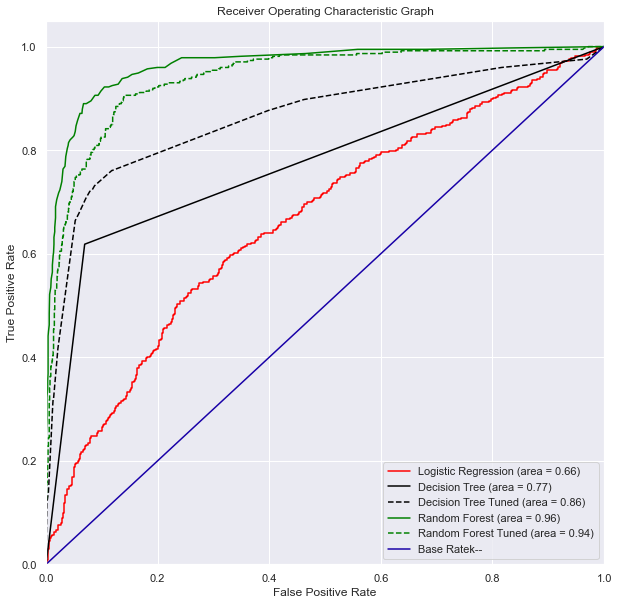

In [101]:
# Comparing multiple ROC
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, y_prob_test[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, y_test_prob_dt[:,1])
dttuned_fpr, dttuned_tpr, dtuned_thresholds = roc_curve(y_test, y_test_prob_dt_tuned[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_test_prob_rf[:,1])
rftuned_fpr, rftuned_tpr, rftuned_thresholds = roc_curve(y_test, y_test_prob_rf_tuned[:,1])

plt.figure(figsize=(10,10))

# Plot Logistic Regression ROC
plt.plot(lr_fpr, lr_tpr, color = 'red', label='Logistic Regression (area = %0.2f)' % lr_roc_auc)

# Plot Decision Tree Tuned ROC
plt.plot(dt_fpr, dt_tpr, color = 'black', label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot Decision Tree Tuned ROC
plt.plot(dttuned_fpr, dttuned_tpr, color = 'black', linestyle='dashed', label='Decision Tree Tuned (area = %0.2f)' % dttuned_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, color = 'green', label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Random Forest Tuned ROC
plt.plot(rftuned_fpr, rftuned_tpr, color = 'green', linestyle='dashed',label='Random Forest Tuned (area = %0.2f)' % rftuned_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Graph')
plt.legend(loc="lower right")
plt.show()


**Insights: Comparing all models clearly shows Hyperparameter tuned random forest model is the best. The random forest without any hyperparameter has higher AUC value but the confusion matrix shows that it is not ideal.**

# Conclusion:
### 1. We explored three types of models, logistic regression, decision tree, random forest, to predict which customer will default on loan (BAD=1) and which customer will be able to repay loan (BAD=0).
### 2. Among the models explored, hyperparameter tuned random forest is the best model to predict which customer will default and which customer will repay loan.
### 3. The first most important feature to consider for decision making using any model is DEBITINC (Debt-to-income ratio).
### 4. The second most important feature to consider for decision making using random forest and logistic regession is CLAGE (Age of the oldest credit line in months).
### 5. The third most important feature to consider for decision making using random forest is DELINQ (Number of delinquent credit lines).